*Name* : Arya Joshi <br>
*Roll No.* : 23B1853 <br>

Acknowledgement :- ChatGPT was used to assist in making this journal report

# **Spin Orbit coupling of Copper**

# Calculations

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sympy as sym


[[376.224975585937 -20.799999999999997]
 [376.3029605998746 -24.799999999999997]
 [376.3809415361336 2.3999999999999995]
 ...
 [626.7065365467325 -41.4]
 [626.7641466106122 -10.2]
 [626.8217495716697 -14.8]]


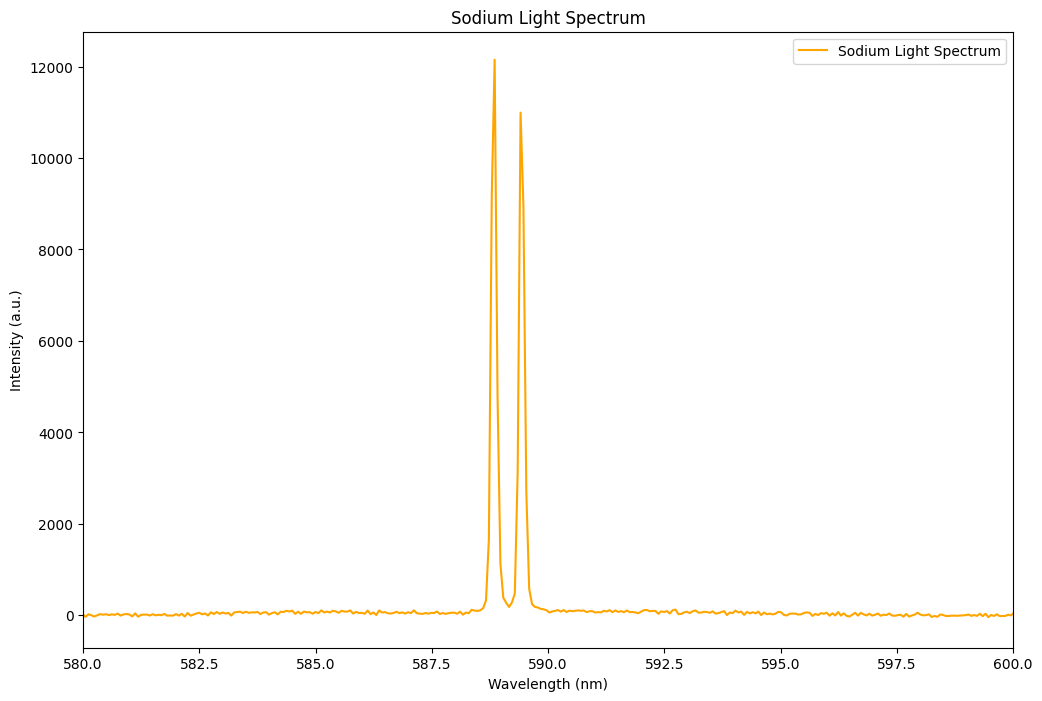

In [14]:
sodium_spectrum = pd.read_excel('grp16_sodiumlight.xlsx')
sodium_spectrum_values = np.array(sodium_spectrum[5:])

print(sodium_spectrum_values)
wavelengths = sodium_spectrum_values[:, 0]
intensities = sodium_spectrum_values[:, 1]

plt.figure(figsize=(12, 8))
plt.plot(wavelengths, intensities, color='orange')
plt.title('Sodium Light Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.xlim(580, 600)
# plt.grid(True)
plt.legend(['Sodium Light Spectrum'])
plt.show()


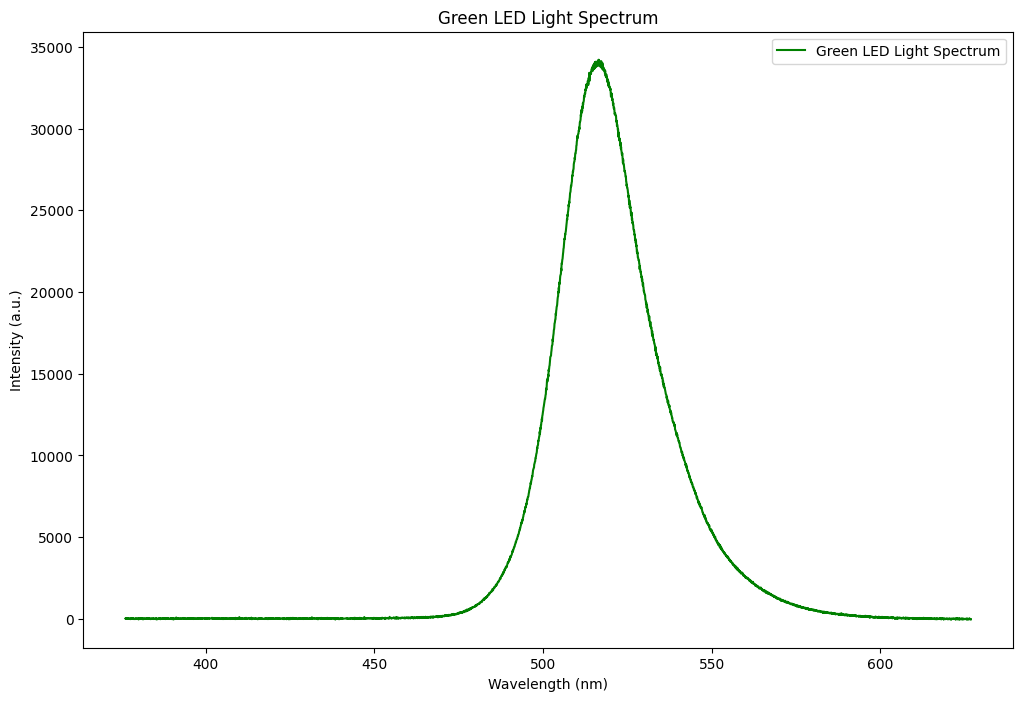

In [15]:
green_led_spectrum = pd.read_excel('grp16_ledlight.xlsx')
green_led_spectrum_values = np.array(green_led_spectrum[5:])

wavelengths_led = green_led_spectrum_values[:, 0]
intensities_led = green_led_spectrum_values[:, 1]

plt.figure(figsize=(12, 8))
plt.plot(wavelengths_led, intensities_led, color='green')
plt.title('Green LED Light Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
# plt.xlim(500, 570)  
# plt.grid(True)
plt.legend(['Green LED Light Spectrum'])
plt.show()

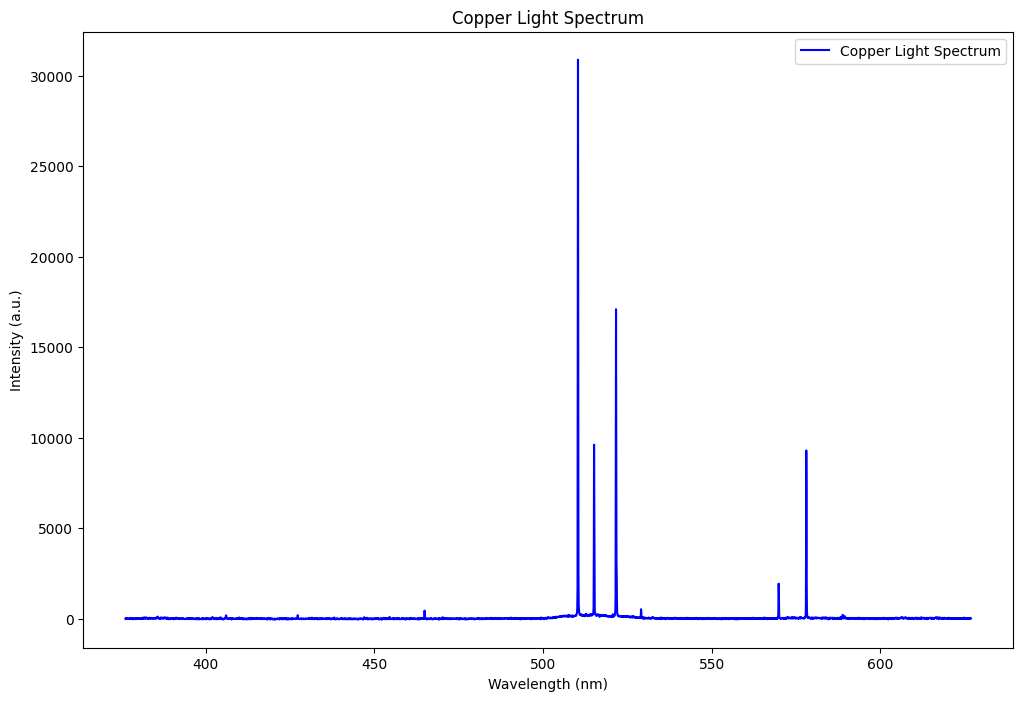

In [16]:
copper_spectrum = pd.read_excel('grp16_copper.xlsx')
copper_spectrum_values = np.array(copper_spectrum[5:])

wavelengths_cu = copper_spectrum_values[:, 0]
intensities_cu = copper_spectrum_values[:, 1]

plt.figure(figsize=(12, 8))
plt.plot(wavelengths_cu, intensities_cu, color='blue')
plt.title('Copper Light Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
# plt.xlim(200, 900)
# plt.grid(True)
plt.legend(['Copper Light Spectrum'])
plt.show()

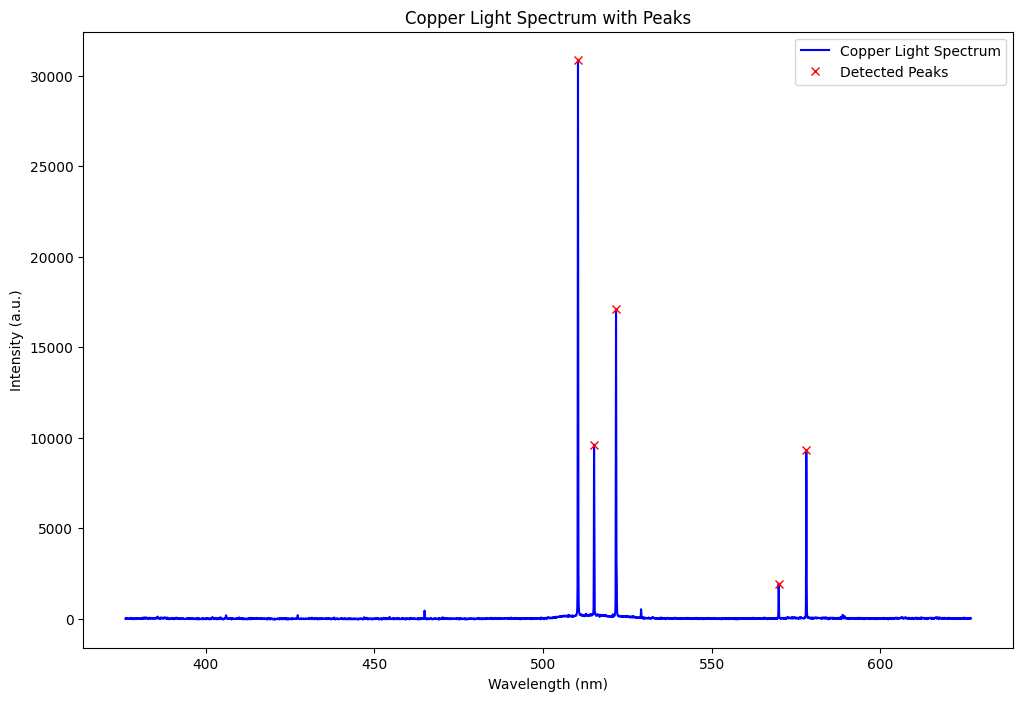

In [17]:
peaks, _ = sp.signal.find_peaks(intensities_cu, height=1000)
# print("Sodium Light Spectrum Peaks at Wavelengths (nm):", wavelengths[peaks])
peak_wavelengths = wavelengths_cu[peaks]
peak_intensities = intensities_cu[peaks]

plt.figure(figsize=(12, 8))
plt.plot(wavelengths_cu, intensities_cu, color='blue')
plt.plot(peak_wavelengths, peak_intensities, "x", color='red')
plt.title('Copper Light Spectrum with Peaks')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
# plt.xlim(200, 900)
plt.legend(['Copper Light Spectrum', 'Detected Peaks'])
plt.show()


In [19]:
E_0 , A1 , A2 = sym.symbols('E_0 A1 A2')


J_f = np.array([9/2 , 7/2 , 5/2 , 3/2])
L_f , S_f = 3 , 3/2
J_d = np.array([7/2 , 5/2 , 3/2 , 1/2])
L_d , S_d = 2 , 3/2

def energy_level(J, L, S, E_0, A1, A2):
    if L == L_f:
        return E_0 + (A1/2)*(J*(J+1) - L*(L+1) - S*(S+1))
    elif L == L_d:
        return (A2/2)*(J*(J+1) - L*(L+1) - S*(S+1))
    
E_levels_f = [energy_level(J, L_f, S_f, E_0, A1, A2) for J in J_f]
E_levels_d = [energy_level(J, L_d, S_d, E_0, A1, A2) for J in J_d]

print("F energy levels:", E_levels_f)
print("D energy levels:", E_levels_d)

Allowed_transitions = {
    "F9/2 to D7/2": (E_levels_f[0] - E_levels_d[0]),
    "F7/2 to D7/2": (E_levels_f[1] - E_levels_d[0]),
    "F7/2 to D5/2": (E_levels_f[1] - E_levels_d[1]),
    "F5/2 to D7/2": (E_levels_f[2] - E_levels_d[0]),
    "F5/2 to D5/2": (E_levels_f[2] - E_levels_d[1]),
    "F5/2 to D3/2": (E_levels_f[2] - E_levels_d[2]),
    "F3/2 to D5/2": (E_levels_f[3] - E_levels_d[1]),
    "F3/2 to D3/2": (E_levels_f[3] - E_levels_d[2]),
    "F3/2 to D1/2": (E_levels_f[3] - E_levels_d[3])
}
print("Allowed Transitions and their Energy Differences:")
for transition, energy_diff in Allowed_transitions.items():
    print(f"{transition}: {energy_diff}")

F energy levels: [4.5*A1 + E_0, E_0, -3.5*A1 + E_0, -6.0*A1 + E_0]
D energy levels: [3.0*A2, -0.5*A2, -3.0*A2, -4.5*A2]
Allowed Transitions and their Energy Differences:
F9/2 to D7/2: 4.5*A1 - 3.0*A2 + E_0
F7/2 to D7/2: -3.0*A2 + E_0
F7/2 to D5/2: 0.5*A2 + E_0
F5/2 to D7/2: -3.5*A1 - 3.0*A2 + E_0
F5/2 to D5/2: -3.5*A1 + 0.5*A2 + E_0
F5/2 to D3/2: -3.5*A1 + 3.0*A2 + E_0
F3/2 to D5/2: -6.0*A1 + 0.5*A2 + E_0
F3/2 to D3/2: -6.0*A1 + 3.0*A2 + E_0
F3/2 to D1/2: -6.0*A1 + 4.5*A2 + E_0


In [20]:
peak_energies = 1 / (peak_wavelengths * 1e-7)
print("Peak Energies (in cm^-1):", peak_energies)

Peak Energies (in cm^-1): [19593.7112173113 19412.57756364119 19170.218558400607 17548.585361894988
 17299.974465725707]


In [34]:
eq1 = sym.Eq(Allowed_transitions["F7/2 to D5/2"], peak_energies[0])
eq2 = sym.Eq(Allowed_transitions["F9/2 to D7/2"], peak_energies[1])
eq3 = sym.Eq(Allowed_transitions["F5/2 to D7/2"], peak_energies[2])
solutions = sym.solve((eq1, eq2, eq3), (E_0, A1, A2))

print("Solutions for E_0, A1, A2:")
print(f"E_0: {solutions[E_0]}, A1: {solutions[A1]}, A2: {solutions[A2]}")
# print(solutions)

Solutions for E_0, A1, A2:
E_0: 19548.3597038659, A1: 30.2948756550750, A2: 90.7030268908393
